In [2]:
import json

import pandas as pd

with open("./SetList.json", encoding="utf8") as data_file:
    data = json.load(data_file)
    default_df = pd.json_normalize(data, "data").assign(**data["meta"])


In [10]:
print(default_df.columns)
print(default_df)

print(default_df["type"].unique())

Index(['baseSetSize', 'code', 'isFoilOnly', 'isOnlineOnly', 'keyruneCode',
       'languages', 'name', 'releaseDate', 'totalSetSize', 'type', 'block',
       'isNonFoilOnly', 'sealedProduct', 'mcmId', 'mcmName',
       'tcgplayerGroupId', 'tokenSetCode', 'parentCode', 'cardsphereSetId',
       'mcmIdExtras', 'mtgoCode', 'isPartialPreview', 'isForeignOnly', 'date',
       'version'],
      dtype='object')
     baseSetSize  code  isFoilOnly  isOnlineOnly keyruneCode   
0              2  P15A        True         False     DEFAULT  \
1              3  PHTR       False         False        PMEI   
2              5   G17        True         False        PMEI   
3              3  PH17       False         False        PMEI   
4              4  PH18       False         False        PMEI   
..           ...   ...         ...           ...         ...   
697            1   ZNC       False         False         ZNC   
698           30   ZNE       False         False         ZNE   
699            5

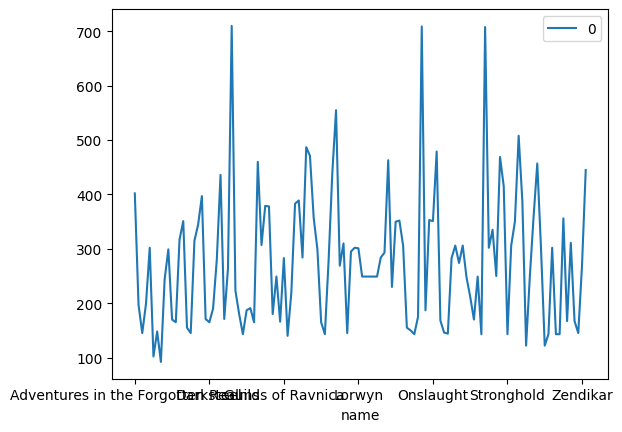

In [12]:
df = default_df.loc[(default_df["type"] == "core") | (default_df["type"] == "expansion")]
df = pd.DataFrame(df["totalSetSize"].values, index=df["name"])

plot = df.plot(kind="line")